#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

### **Semana 11**
####**Actividad en clase: Aprendizaje No Supervisado : Agrupamiento Jerárquico (Hierarchical Clustering)**

Veremos un ejemplo de agrupamiento jerárquico con la base de datos llamada "Mall_Customers.csv", que encuentras en la siguiente liga de Kaggle:

https://www.kaggle.com/datasets/shwetabh123/mall-customers 

Los datos tienen información de clientes a una plaza comercial. En particular veremos el ejemplo de agrupamiento jerárquico considerando los ingresos anuales de los clientes y una calificación basada en cuánto gastan usualmente los clientes en dicha plaza comercial.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

import scipy.cluster.hierarchy as sch   # requerimos el módulo referente a la agrupamiento jerárquico.
from sklearn.cluster import AgglomerativeClustering    # usaremos la técnica de agrupamiento llamada aglomerativa 

In [2]:
df = pd.read_csv('Mall_Customers.csv')    # DataFrame de Pandas

print(df.shape)
df.head() 

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Consideremos para este primer ejemplo los factores **Annual Income (k$)** y **Spending Score(1-100)**. 

In [3]:
X = df.iloc[:, [3, 4]].values

df = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


###Como todos aquellos métodos o técnicas que se basan en métricas de distancia, se requiere escalar o normalizar los datos para que la magnitud por sí misma no sea un criterio de decisión.

###En este caso observamos que los datos están relativamente en el mismo rango de variabilidad, por lo que no los transformaremos en esta primera aproximación.

###Obtengamos primeramente el dendrograma de estos factores. Usemos la técnica predeterminada para el agrupamiento llamada "ward" y la distancia euclidiana.

##Puedes variar dichas opciones y observar si existe alguna diferencia en los resultados obtenidos.

###Recuerda consultar la documentación de scikit-learn respectiva:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html


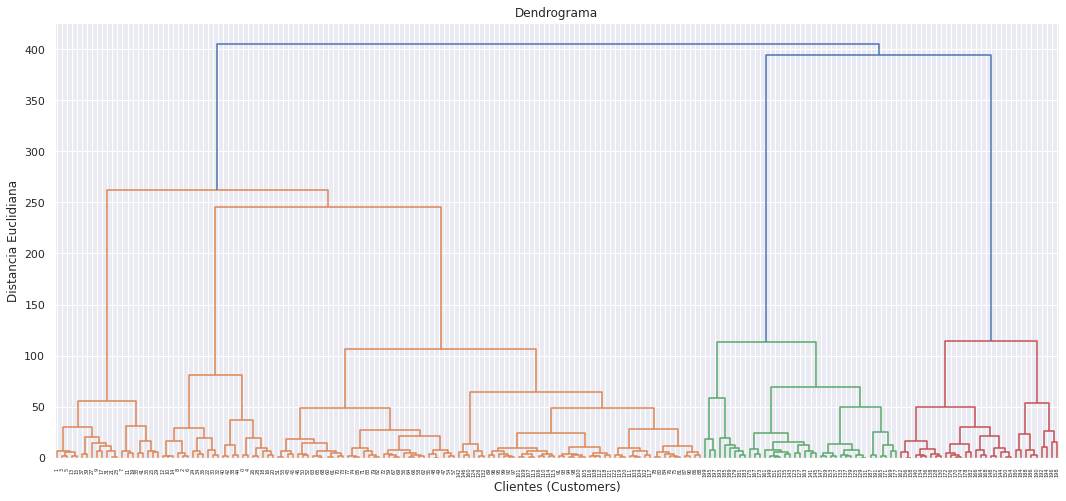

In [5]:
sns.set(rc={'figure.figsize':(18,8)})

dendrograma = sch.dendrogram(sch.linkage(df, method = 'ward', metric='euclidean')) 

plt.title('Dendrograma') 
plt.xlabel('Clientes (Customers)') 
plt.ylabel('Distancia Euclidiana') 
plt.show() 

###Del dendrograma podemos observar, siguiendo el método de las rectas horizontales a lo largo de la recta vertical más arga, que 5 cúmulos puede ser un buen número para generar el agrupamiento por cúmulos jerárquico.

###Observa que esta técnica de determinar el número de cúmulos, puede considerarse como un método análogo al método del codo en la técnica de PCA.

In [6]:
# Llevemos a cabo el agrupamiento con los cúmulos y métricas determinadas previamente:

agg_cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

y_clusters = agg_cluster.fit_predict(X)   # generamos los cúmulos

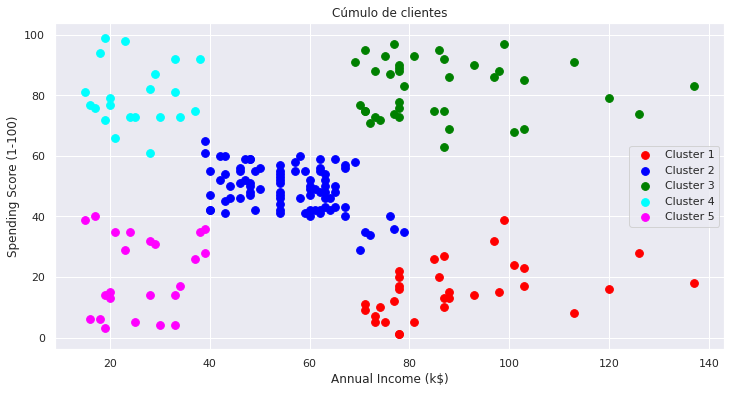

In [7]:
# Graficamos ahora cada uno de los cúmulos obtenidos:
sns.set(rc={'figure.figsize':(12,6)})
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0, 1], s = 60, c = 'red', label = 'Cluster 1') 
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1, 1], s = 60, c = 'blue', label = 'Cluster 2') 
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2, 1], s = 60, c = 'green', label = 'Cluster 3') 
plt.scatter(X[y_clusters == 3, 0], X[y_clusters == 3, 1], s = 60, c = 'cyan', label = 'Cluster 4')  
plt.scatter(X[y_clusters == 4, 0], X[y_clusters == 4, 1], s = 60, c = 'magenta', label = 'Cluster 5')

plt.title('Cúmulo de clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()   # Para incluir la equivalencia de colores y clusters
plt.show()

###Observemos la manera en que se agrupan los clientes con base a sus ingresos y su historial de compras.

###**Fin del ejercicio de la semana 11 : Agrupamiento Jerárquico**